<a href="https://colab.research.google.com/github/ykitaguchi77/CorneAI/blob/main/YOLOv5_interference_diverse_iris_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YOLOv5 inference_diverse_iris_model**

In [146]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [147]:
%cd /gdrive/MyDrive/Deep_learning/CorneAI_nagoya/yolo5_forcresco

/gdrive/MyDrive/Deep_learning/CorneAI_nagoya/yolo5_forcresco


In [148]:
%%writefile requirements.txt

# pip install -r requirements.txt

# Base ----------------------------------------
matplotlib>=3.2.2
numpy>=1.18.5
opencv-python-headless>=4.6.0.66
Pillow>=7.1.2
PyYAML>=5.3.1
##requests>=2.23.0
scipy>=1.4.1
# torch>=1.7.0
# torchvision>=0.8.1
tqdm>=4.41.0

# Logging -------------------------------------
##tensorboard>=2.4.1
# wandb

# Plotting ------------------------------------
##pandas>=1.1.4
##seaborn>=0.11.0

# Export --------------------------------------
# coremltools>=4.1  # CoreML export
# onnx>=1.9.0  # ONNX export
# onnx-simplifier>=0.3.6  # ONNX simplifier
# scikit-learn==0.19.2  # CoreML quantization
# tensorflow>=2.4.1  # TFLite export
# tensorflowjs>=3.9.0  # TF.js export

# Extras --------------------------------------
# albumentations>=1.0.3
# Cython  # for pycocotools https://github.com/cocodataset/cocoapi/issues/172
# pycocotools>=2.0  # COCO mAP
# roboflow
thop  # FLOPs computation

Overwriting requirements.txt


In [149]:
!pip install -r requirements.txt

In [ ]:
#最新バージョンでも動くので削除
# !pip install torch==1.10.1+cu113 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install torchvision==0.11.2+cu113 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.10.1+cu113 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2

In [150]:
import glob
weight = "/gdrive/MyDrive/Deep_learning/CorneAI_nagoya/yolo5_forcresco/weights/eye_nii_2202_onecaseoneimage2_doctorcompare_yolov5s_epoch200_batch16_89.8p/last.pt"

num = 5
img_dir = "/gdrive/MyDrive/Deep_learning/CorneAI_nagoya/yolo5_forcresco/data"
img = glob.glob(f"{img_dir}/*")[num]
img

img = "/gdrive/MyDrive/Deep_learning/CorneAI_nagoya/yolo5_forcresco/runs/detect/exp/APAC_fko0078.jpg"

In [ ]:
!python detect.py  --weights $weight  --source $img

# 必要な部分だけ抜粋

In [151]:
from models.common import DetectMultiBackend
#from utils.datasets import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
#from utils.plots import Annotator, colors, save_one_box
#from utils.torch_utils import select_device, time_sync
from PIL import Image
import torch
from torchvision import models, transforms
import cv2
import numpy as np


device = 'cpu'
#device = select_device(device)
model = DetectMultiBackend(weight, device="cpu", dnn=False)
#stride, names, pt, jit, onnx, engine = model.stride, model.names, model.pt, model.jit, model.onnx, model.engine
#imgsz = check_img_size([640], s=stride)  # check image size

class_names = {0:"infection", 1:"normal", 2:"non-infection", 3:"scar", 4:"tumor", 5:"deposit", 6:"APAC", 7:"lens opacity", 8:"bullous"}

# transform = transforms.Compose([
#             transforms.Resize(size=(480,640)),
#             transforms.ToTensor(),
#             # transforms.Normalize(
#             #     mean=[0.5, 0.5, 0.5],
#             #     std=[0.5, 0.5, 0.5]
#             #    )
#             ])

img_pil = Image.open(img)  #PILで開く(streamlitの仕様)
img_numpy = np.array(img_pil, dtype=np.uint8)
img_cv2 = cv2.cvtColor(img_numpy, cv2.COLOR_RGB2BGR)

#img_cv2 = cv2.imread(img)
#img_cv2 = cv2.resize(img_cv2, dsize=(480, 640)) #480*600pxにリサイズ
img_cv2 = img_cv2.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB
img_cv2 = np.ascontiguousarray(img_cv2)
img_tensor = torch.from_numpy(img_cv2).float()

#img_tensor = transform(img_np)
img_tensor /= 255
# print(img_tensor.shape)
# print(img_tensor)
img_tensor = torch.unsqueeze(img_tensor, 0)  # バッチ対応


pred = model(img_tensor, visualize=False, augment=False)

# multi_label=Trueにすることにより全クラスの値のlikelihoodを取得できる。数値が低いものが省略されないようconf_thres=0にしている。
pred = non_max_suppression(pred, conf_thres=0, iou_thres=0.45, classes=None , multi_label=True, max_det=1000)


# 全てのクラスとlikelihoodのペアを取得
class_likelihood_pairs = [(pred[0][row][4].item(), int(pred[0][row][5].item())) for row in range(8)]

# likelihoodで降順にソート
class_likelihood_pairs.sort(reverse=True, key=lambda x: x[0])

# 上位3つのクラスとlikelihoodを出力
print("Top 3 Classes and Likelihoods:")
for i in range(3):
    likelihood, class_num = class_likelihood_pairs[i]
    print(f"Class {class_num}: Likelihood {likelihood:.5f}")

Fusing layers... 
Model Summary: 213 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs


Top 3 Classes and Likelihoods:
Class 6: Likelihood 0.97141
Class 4: Likelihood 0.06582
Class 3: Likelihood 0.01356


#**Inference using Cornea journal dataset**

In [ ]:
images_dir = "/gdrive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/Iris_color/taki_dr_Cornea/taki_dr_dataset"
excel_path = "/gdrive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/Iris_color/taki_dr_Cornea/corneaのスマホ判定_滝先生.xlsx"
orig_weight_path = "/gdrive/MyDrive/Deep_learning/CorneAI_nagoya/yolo5_forcresco/weights/eye_nii_2202_onecaseoneimage2_doctorcompare_yolov5s_epoch200_batch16_89.8p/last.pt"
new_weight_path = "/gdrive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/Iris_color/oda_dr_diverse_model/2.始めから混合データセットで学習/last.pt"

In [ ]:
import pandas as pd

# Read the Excel file starting from row 13 (which is indexed as 12 in Python) for headers
df = pd.read_excel(excel_path, header=12)

# Display the first few rows of the dataframe
df.head()

,Number,あり1なし0,備考,year,volume,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,1,1.0,NaN,2023,42,...,NaN,NaN,NaN,NaN,NaN
1,2,1.0,薄い虹彩,2023,42,...,NaN,NaN,NaN,NaN,NaN
2,3,1.0,薄い虹彩,2023,42,...,bullous,NaN,NaN,NaN,NaN
3,4,1.0,NaN,2023,42,...,1,NaN,122.0,NaN,NaN
4,5,0.0,NaN,2022,41,...,0,NaN,15.0,NaN,NaN


In [152]:
import os
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# df = pd.read_csv('your_dataframe.csv')  # Replace with your DataFrame loading method

# Directory path
images_dir = "/gdrive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/Iris_color/taki_dr_Cornea/taki_dr_dataset"

# Define the columns for the new DataFrame
columns = ["image_num", "class", "top1_baseline", "top2_baseline", "top3_baseline",
           "top1_newmodel", "top2_newmodel", "top3_newmodel"]

# Create an empty DataFrame with the specified columns
cornea_journal_df = pd.DataFrame(columns=columns)

# Iterating over each file in the directory
for filename in os.listdir(images_dir):
    if filename.endswith(".png"):
        # Extracting the numeric part (image number) from the filename
        image_num = int(filename.split('.')[0])

        # Match with the DataFrame and extract 'クラス' value
        matched_row = df[df['Number'] == image_num]
        if not matched_row.empty:
            class_value = matched_row['クラス'].iloc[0]
            # Creating a new row as a DataFrame
            row_data = pd.DataFrame({"image_num": [image_num], "class": [class_value]})
            # Concatenating the new row DataFrame with the main DataFrame
            cornea_journal_df = pd.concat([cornea_journal_df, row_data], ignore_index=True)

# Sort the DataFrame by the image_num column
cornea_journal_df.sort_values(by='image_num', inplace=True)

# Displaying the sorted DataFrame
print(cornea_journal_df)


    image_num class top1_baseline top2_baseline top3_baseline top1_newmodel  \
123         2     0           NaN           NaN           NaN           NaN   
126         3     0           NaN           NaN           NaN           NaN   
122         8     2           NaN           NaN           NaN           NaN   
153         9     5           NaN           NaN           NaN           NaN   
119        12     3           NaN           NaN           NaN           NaN   
..        ...   ...           ...           ...           ...           ...   
69        371     0           NaN           NaN           NaN           NaN   
76        372     5           NaN           NaN           NaN           NaN   
77        373     5           NaN           NaN           NaN           NaN   
79        374     5           NaN           NaN           NaN           NaN   
95        375     4           NaN           NaN           NaN           NaN   

    top2_newmodel top3_newmodel  
123           NaN

In [153]:
# 画像のクラスを確認
# Getting the distribution of the 'class' column and sorting by class values
class_distribution = cornea_journal_df['class'].value_counts().sort_index()

# Displaying the distribution
print(class_distribution)

0    46
1     7
2     9
3    31
4    33
5    32
8     4
Name: class, dtype: int64


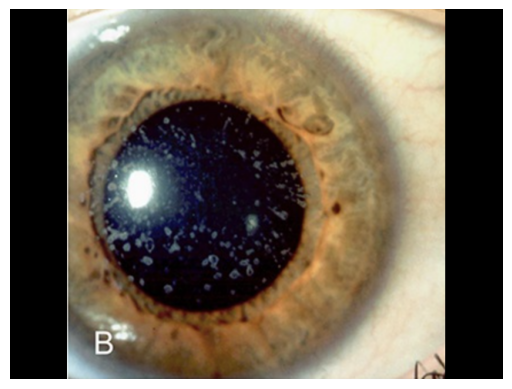

Top 3 Classes and Likelihoods:
Class 5 (deposit): Likelihood 0.94923
Class 3 (scar): Likelihood 0.01477
Class 4 (tumor): Likelihood 0.01194


In [169]:
from models.common import DetectMultiBackend
#from utils.datasets import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
#from utils.plots import Annotator, colors, save_one_box
#from utils.torch_utils import select_device, time_sync
from PIL import Image
import torch
from torchvision import models, transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


device = 'cpu'
#model = DetectMultiBackend(orig_weight_path, device="cpu", dnn=False)
# model = DetectMultiBackend(new_weight_path, device="cpu", dnn=False)

class_names = {0:"infection", 1:"normal", 2:"non-infection", 3:"scar", 4:"tumor", 5:"deposit", 6:"APAC", 7:"lens opacity", 8:"bullous"}

def letterbox_image(image, size=(640, 480)):
    ih, iw = image.shape[:2]
    w, h = size

    # Calculate padding to maintain aspect ratio
    scale = min(w / iw, h / ih)
    nw, nh = int(scale * iw), int(scale * ih)
    image = cv2.resize(image, (nw, nh))

    # Calculate padding dimensions
    top = (h - nh) // 2
    bottom = h - nh - top
    left = (w - nw) // 2
    right = w - nw - left

    # Add padding to the image
    return cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

def inference_top3(img_path, model):
    img_cv2 = cv2.imread(img_path)

    # Apply letterbox to the image
    img_cv2 = letterbox_image(img_cv2, size=(640, 480))
    #img_cv2 = cv2.resize(img_cv2,(640, 480))

    # Display the image using Matplotlib（表示させない場合はコメントアウトする）
    img_mpl = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
    plt.imshow(img_mpl)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

    img_cv2 = img_cv2.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB
    img_cv2 = np.ascontiguousarray(img_cv2)
    img_tensor = torch.from_numpy(img_cv2).float()

    img_tensor /= 255
    img_tensor = torch.unsqueeze(img_tensor, 0)  # Add batch dimension
    pred = model(img_tensor, visualize=False, augment=False)

    # multi_label=Trueにすることにより全クラスの値のlikelihoodを取得できる。数値が低いものが省略されないようconf_thres=0にしている。
    pred = non_max_suppression(pred, conf_thres=0, iou_thres=0.45, classes=None , multi_label=True, max_det=1000)


    # 全てのクラスとlikelihoodのペアを取得
    class_likelihood_pairs = [(pred[0][row][4].item(), int(pred[0][row][5].item())) for row in range(8)]

    # likelihoodで降順にソート
    class_likelihood_pairs.sort(reverse=True, key=lambda x: x[0])

    # 上位3つのクラスとlikelihoodを出力
    print("Top 3 Classes and Likelihoods:")
    for i in range(3):
        likelihood, class_num = class_likelihood_pairs[i]
        print(f"Class {class_num} ({class_names[class_num]}): Likelihood {likelihood:.5f}")

img = glob.glob(f"{images_dir}/*")[0]
inference_top3(img, model)

In [ ]:
for num in cornea_journal_df["image_num"][0:10]:
      img = f"{images_dir}/{num}.png"
      inference_top3(img, model)